Load the `ISLR2` and `tidyverse` packages.

In [1]:
library(ISLR2)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.0      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.0 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:
Auto |> glimpse()

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

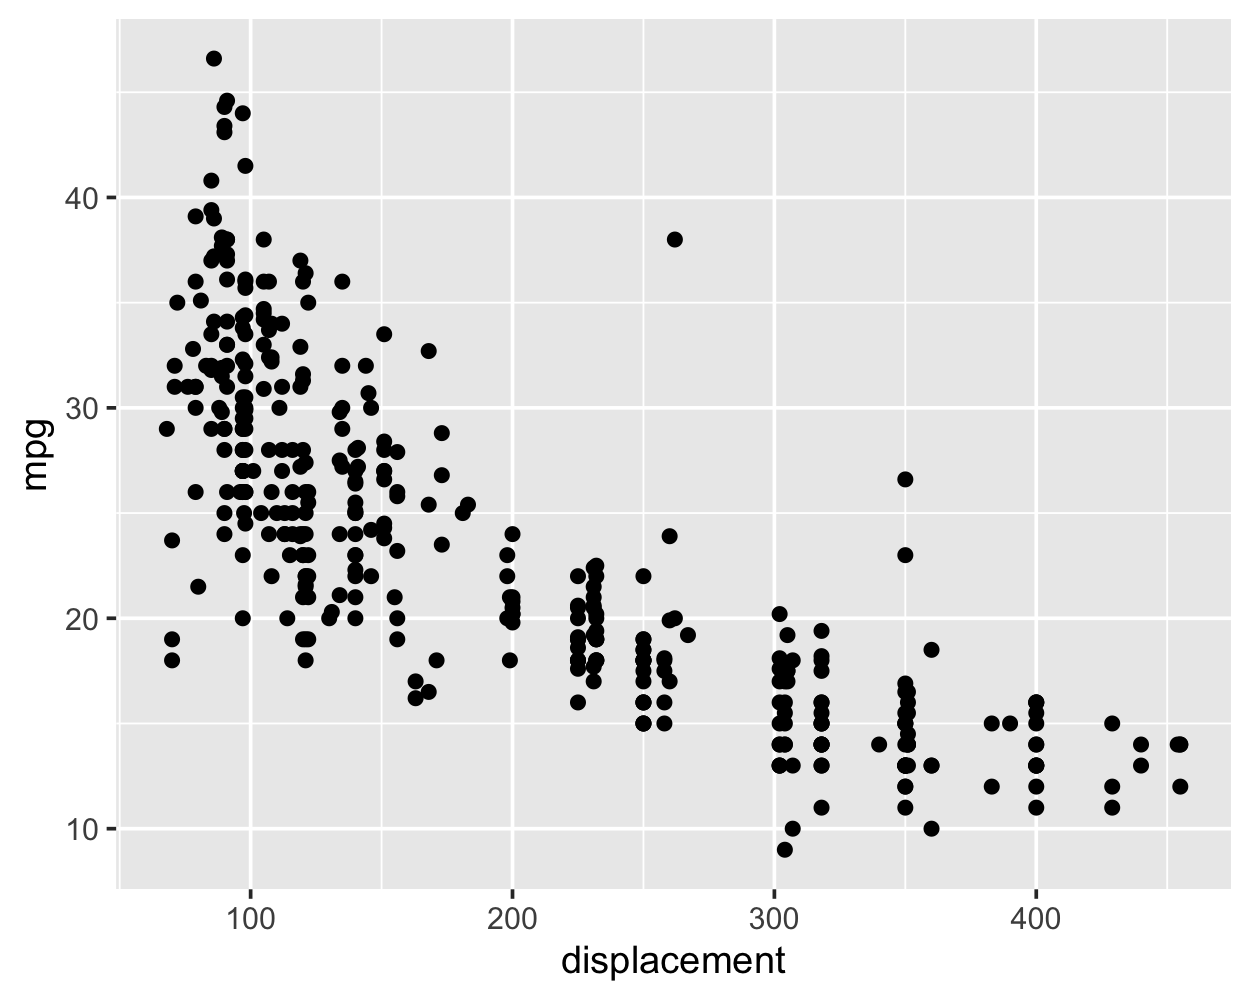

In [3]:
ggplot(data=Auto,aes(x=displacement,y=mpg))+
    geom_point()

❓Does the relationship of `mpg` to `displacement` look linear?

No, it does not look linear! It might be a reciprocal relationship where mpg is a function of 1/displacement.

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [60]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_ns(displacement,deg_free = 2) |>
    step_mutate(cyl_cat=factor(cylinders))|>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    prep()

In [61]:
rec |> juice() |> head()

mpg,displacement_ns_1,displacement_ns_2,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,0.5467424,0.09112261,0,0,0,1
15,0.4919853,0.28283854,0,0,0,1
18,0.5356218,0.13686060,0,0,0,1
16,0.5493901,0.07908955,0,0,0,1
17,0.5510602,0.07117635,0,0,0,1
15,0.3348331,0.69981039,0,0,0,1


In [62]:
mod = linear_reg() |> set_engine('lm')
mod_fit = mod |> fit (mpg ~ ., data=rec |> juice())
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),21.13013,2.088061,10.119498,1.683025e-21
displacement_ns_1,-33.29547,3.243890,-10.264058,5.217377e-22
displacement_ns_2,-14.53542,2.237908,-6.495092,2.566384e-10
cyl_cat_X4,13.35997,2.161911,6.179705,1.636586e-09
cyl_cat_X5,15.36977,3.305859,4.649253,4.584720e-06
cyl_cat_X6,14.11747,2.582537,5.466511,8.266403e-08
cyl_cat_X8,14.00785,2.901828,4.827252,1.999865e-06


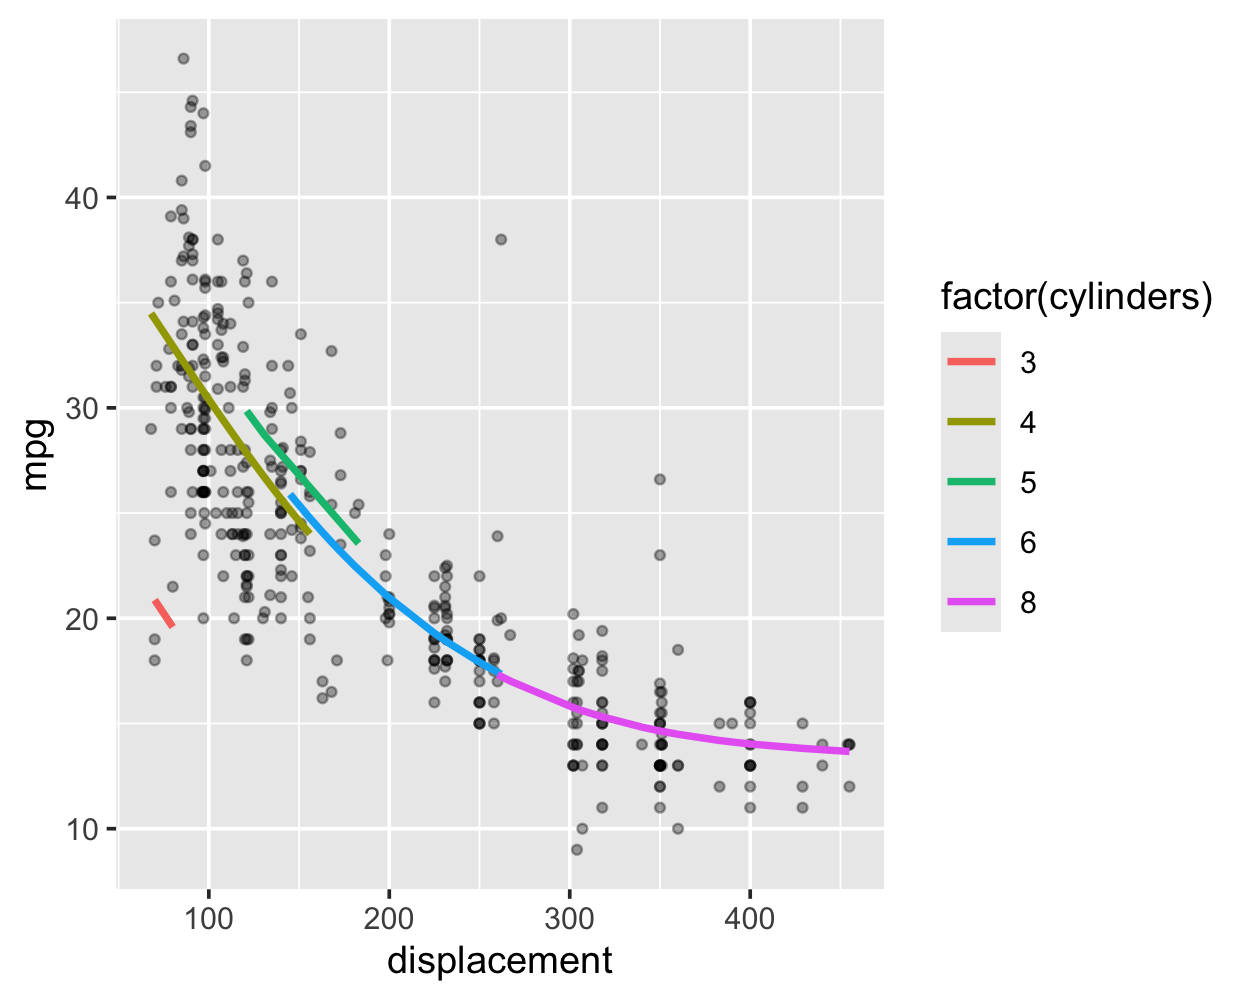

In [63]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
    ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)